In [1]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.3.1
2.4.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
# from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0].shape)

nb_classes = len(np.unique(y_train))
n_samples = X_train.shape[0]

(60000, 784)
(10000, 784)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))
(784,)


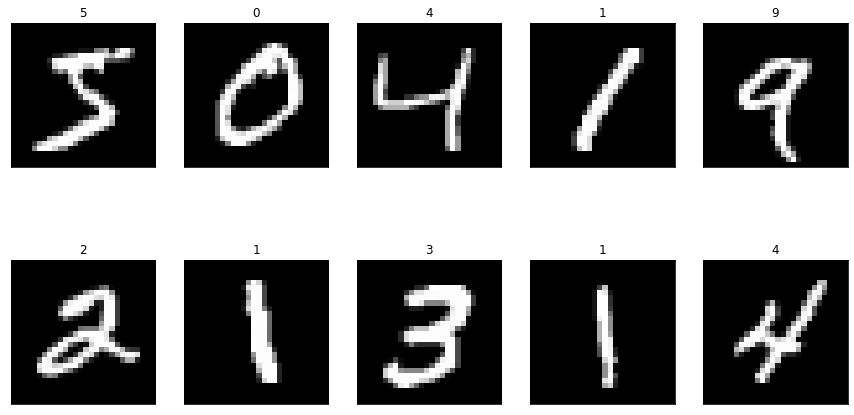

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_train, X_train, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

In [5]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

X_train[0].shape

(784,)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import History
from tensorflow.keras.regularizers import l2

history = History()
model = Sequential()
model.add(Dense(100,activation="relu",input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.1)))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="categorical_crossentropy",optimizer=Adam, metrics=["categorical_accuracy"])


early_stopping = EarlyStopping(patience=3)

model.fit(X_train,y_train, batch_size=32, validation_split=0.3, epochs=10, callbacks=[early_stopping, history])


# model.load_weights("wagi_20news_dense.h5py")
# model.evaluate(X_test_transformed, y_test)

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 5.6036 - categorical_accuracy: 0.6221 - val_loss: 1.3121 - val_categorical_accuracy: 0.8588
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 1.1916 - categorical_accuracy: 0.7977 - val_loss: 0.9631 - val_categorical_accuracy: 0.8772
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 1.0324 - categorical_accuracy: 0.8151 - val_loss: 0.8696 - val_categorical_accuracy: 0.8846
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.9537 - categorical_accuracy: 0.8265 - val_loss: 0.8072 - val_categorical_accuracy: 0.8893
Epoch 5/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8970 - categorical_accuracy: 0.8357 - val_loss: 0.7566 - val_categorical_accuracy: 0.8934
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8517 - categorical_accuracy: 0.8410 - val_loss: 0.7190 - val_categorical_accuracy:

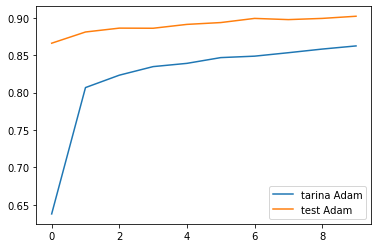

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['categorical_accuracy'], label = "tarina Adam")
plt.plot(history.history['val_categorical_accuracy'], label = "test Adam")

plt.legend()
plt.show()